In [28]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import os
import random

from collections import Counter
from scipy.stats import entropy

# Huffman Compression Algorithm

## What is compression?
Throughout time, computers have always had an issue with insufficient resources. The two being processing power and memory. 

* **Compression** is the process of utilizing processing power to produce files with smaller sizes than their uncompressed counterparts, which can be **decompressed**. 
    
* **Decompression** is the reverse process - reverting the compressed files back to their original form.

### How does compression work?

The compression process is a rather simple one - finding a way to **express the same data in a different way, that requires less memory** than the original.


### An example of compression

Consider the following character sequence:
#### aaaabbbc
        
We can use a method called **[Run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding)** to transform the sequence into:

#### <font color="red">4</font>a<font color="red">3</font>bc

We have in fact, compressed the information. The first string requires **8 bytes** of storage, while the second one only requires **5 bytes**.

The information, albeit shorter now, is more complex.

##### Both compression and decompression require processing power. 
##### In the case of Run-lenght encoding, compressed data is still easily readable. This is not always the case with other compression algorithms.

### Lossless and Lossy Compression

Both Run-length encoding and Huffman Compression are **Lossless** compression algorithms, as no data is lost during compression and it's fully recovered after decompression.

In **Lossy** compression, parts of the data are deemed **insignificant** and are **entirely skipped or simplified** using different techniques such as averaging or approximation.


### Why would you ever use Lossy Compression?


Even though in present time most computers have large amounts of memory available, storing different media files in their pure form takes suprisingly large amounts of space.

Let's have a look at two images.

In [29]:
%%html
<table><tr><td><img src="images/k2.jpg"/></td><td><img src="images/k2-50.jpg"/></td></tr></table>

,


#### The images look the same don't they? Let's check their file sizes in bytes.
(You might need to zoom in if you are looking at them in a browser, the left image appears much more blurry on Chrome @ 1920x1080 at 100% zoom, this is because of browser rendering)

In [30]:
size1 = os.path.getsize('images/k2.jpg')
size2 = os.path.getsize('images/k2-50.jpg')
print(size1, size2)

484608 218836


The second image is more than 2 times smaller than the first one.

The reason being that, **JPEG is a lossy compression method**. In the last example, there is almost no noticable difference between the images.

Let's see how the image looks like when it's compressed to less than **10% of it's original size**.

<img src="images/k2-10.jpg" width="50%"/>

In [31]:
os.path.getsize('images/k2-10.jpg')

33657

We can see that the image is starting to **lose a lot of details**, and there are a lot of **noticable artifacts**.

### To get away with lossy compression, we need to be very careful of how much detail we lose.

## Why do we compress data at all?

In the real world, large datasets are very similar in structure or content.

The image above in a non-compressed format, such as **.BMP** would take much more space. A **Bitmap** is a raster format where for each pixel of the image the RGB values are saved as bytes. A **24-bit Bitmap uses 8 bits for each color of each pixel. That's 3 bytes for every pixel on the image.**

The image above has the size of a standard Full HD screen, **1920 x 1080**.

Excluding metadata in the file, it would take at least **6 220 800 bytes** to store the same image as a **.BMP**.

Let's take a look at **video data**. We now know that we need around **6 MB** for a single 1920 x 1080 RGB Colored image, which we will call a **frame**.

Standard video formats play at around **25 frames per second**. For the average movie, with a duration of around **01:30:00** that's **5 400 seconds**. At 25 frames per second, that's **135 000** different frames for the whole movie.

Saving this amount of data pure and uncompressed, would take more than **810 000 MB (>791 GB)** of storage, and we haven't taken audio into account yet!

#### We have to be aware that there is no "best" compression method for all kinds of data, as all data is different and there are different ways to compress said data.

##### Yet, we all watch Full HD movies on Blu-Ray or even stream them over the internet. <font color="red">Thanks compression!</font>





## What is Huffman Compression?

The algorithm can be summarized as follows:
* Find the repeating data units
* Order the repeating data units by their frequency in the dataset
* Assign shorter keys to units that are seen more frequently and longer keys to units that are seen less frequently.
* Use the keys to express the data

##### Now let's get into details.

## Getting to know the data we are compressing

We first need to be aware what kind of data we are dealing with. To be able to compress, **we need to find things that repeat or are related** and express them in a more compact way. The amount of **suprise data** we have is inversely proportional to the efficiency of the compression. In information theory, this amount of uncertainty or **suprise** is called **entropy**.


## What is entropy?

In all scientific fields, **entropy** is a measure of **the amount of chaos in a system**. 

In information theory, **entropy is the expected value of the self-information**, it measures the **unpredictability** of a particular event and the **average amount of information** that particular event gives us. 

##### To get a better understanding of it, let's plot the entropy of different types of coins, biased and fair.

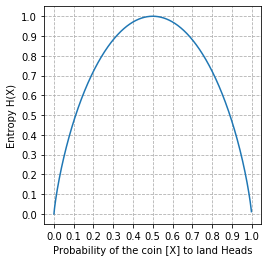

In [32]:
def plot_coin_entropy(number_of_coins):
    """Plots the entropy of differently biased coins"""
    
    #Each coin will have a probability for heads and tails, which should sum up to a total of 1
    heads_probabilities = np.arange(0, 1, 1 / number_of_coins)
    tails_probabilities = np.arange(1, 0, -1 / number_of_coins)

    #Sum the probabilities
    total_prob = heads_probabilities + tails_probabilities

    #Ensure that the sum of probabilities are equal to 1
    all_probabilities_equal_to_1 = not np.all(total_prob == 1)
    assert all_probabilities_equal_to_1
    
    
    entropy_values = []
    #Calculate the entropy for each coin using scipy.stats.entropy()
    for i in range(0, number_of_coins):
        entropy_value = entropy([heads_probabilities[i], tails_probabilities[i]], base = 2)
        entropy_values.append(entropy_value)
        
    #Configure plot
    ax = plt.figure().gca()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('Probability of the coin [X] to land Heads')
    plt.ylabel('Entropy H(X)')
    plt.grid(ls = '--')
    plt.plot(heads_probabilities, entropy_values)
    

plot_coin_entropy(1000)

### We can see that the more biased a coin is, the lower the entropy.

Given a random variable ${X}$, with possible outcomes ${x_{i}}$, each with probability ${P_{X}(x_{i})}$, the entropy ${H(X)}$ of ${X}$ is as follows:

\begin{equation*}
H(X)=-\sum _{i}P_{X}(x_{i})\log _{b}{P_{X}(x_{i})}=\sum _{i}P_{X}(x_{i})I_{X}(x_{i})=\operatorname {E} [I_{X}]
\end{equation*}


Information entropy is typically measured in **bits**, corresponding to base **2** in the equation and the **.entropy()** function in the code above. Other units might also be used.

Remember ***Run-length encoding***? The compressed sequence has a higher **entropy rate** than it's non-compressed counterpart, as each character is **more surprising** and carries **more information**.

## How does entropy help us compress data?

Let's say that we had to guess a number between 1 and 8, with each number having the same odds of being chosen (**12.5%** or **1 / 8**).

##### What is the minimum amount of  **yes/no *(binary)*** questions we have to ask in order to arrive at the correct number?

The answer is the **entropy of the system**, which is equal to ${\log _{2} 8} = 3$.

# Binary search trees

A binary search tree is a data structure that allows for fast lookup by **comparing elements**.

Everyone has played the game where you had to guess a number between 1 and 100. The easiest way to find the number is to perform a **binary search**.

### What is binary search?

Let's say we had to guess a number between 1 and 4, with each number being equally likely to have been chosen.

<img src="images/bst_4.png" width="40%"/>

Every **no** answer, we will code **as 0** and every **yes** answer, we will code **as 1**.

The **binary codes** for every number would be as follows:
* **00** - 1
* **01** - 2
* **10** - 3
* **11** - 4

Each code is of **equal length**, as each outcome has the same probability of happening. This does not help us compress anything, because we **cannot express data in any shorter way**.

But what if the **codes** were of **different lengths**?

Let's now use the concept of **entropy**. What if the person asking us to guess the number **really likes the number 3** and picks it **85% of the time** ?

We now have **significant information** and **different probabilities** that can help us in our guess.
Let's change the binary search tree a little bit.

<img src="images/bst_3.png" width="40%"/>

We have the following lookup table containing answers to the questions in binary, with **different lengths**. We have indeed created is called a **Huffman Tree**.

* 1 - **01**
* 2 - **001**
* 3 - **1**
* 4 - **000**


#### The Huffman Tree helps us resolve data in a shorter way, dependent on it's weight in a system.

If we had to guess numbers at **equal probabilities** (using the first tree) the questions we would ask to resolve the number sequence
```
33213413
```

Would be: ```yes no; yes no; no yes; no no; yes no; yes yes; no no; yes no```

In binary: ```10 10 01 00 10 11 00 10```

##### That's <font color="red">16 bits</font> (the total number of answers).

Let's now resolve the same sequence with the second approach (the **Huffman Tree**), with **different probabilities** for each number.

Answers: ```yes; yes; no no yes; no yes; yes; no no no; no yes; yes```

Binary: ```1 1 001 01 1 000 01 1```

##### That's <font color="red">14 bits</font> (we have <font color="red">2 answers less</font> and have still resolved all numbers).

### The role of the Huffman Tree
By using a **Huffman Tree**, we are trying to reduce the average amount of questions asked before coming to a conclusion about the data. The **data that is more likely to appear is expressed in a shorter way than data that is less likely to appear**.



##### Let's simulate the situation where we are given a sequence of numbers, and we try to guess them using both methods, knowing that the odds of getting a ```3``` is 85%. 

In [34]:
def huffman_tree_encode(n):
    output = ''
    n = int(n)
    if n == 3:
        output += '1'
    else:
        output += '0'
        if n == 1:
            output += '1'
        else:
            output += '0'
            if n == 2:
                output += '1'
            else:
                output += '0'
    
    return output

def bst_encode(n):
    n = int(n) - 1
    return f'{int(n/2)}{n%2}'

Let's write some tests to ensure that the code returns the correct values from the above tables. 

If the functions work correctly we should get ```Pass!``` twice.

In [35]:
def test_huffman_tree_encode():
    assert huffman_tree_encode('1') == '01'
    assert huffman_tree_encode('2') == '001'
    assert huffman_tree_encode('3') == '1'
    assert huffman_tree_encode('4') == '000'
    
    print('Pass!')
    
def test_bst_encode():
    assert bst_encode('1') == '00'
    assert bst_encode('2') == '01'
    assert bst_encode('3') == '10'
    assert bst_encode('4') == '11'
    
    print('Pass!')
    
test_huffman_tree_encode()
test_bst_encode()

Pass!
Pass!


#### Now it's time to generate the sequences of numbers.

In [36]:
def generate_sequence(length):
    output = '';
    
    for i in range(length):
        n = random.randint(1,100)
        if n <= 85: 
            output += '3'
        elif n <= 90: 
            output += '1'
        elif n <= 95: 
            output += '2'
        else:
            output += '4'
    
    return output

#### Let's test the length of the ouput to make sure the function works correctly. 

We should get a ```Pass!``` here as well.

In [37]:
def test_generate_sequence():
    assert len(generate_sequence(10)) == 10
    assert len(generate_sequence(100)) == 100
    
    print("Pass!")
    
test_generate_sequence()

Pass!


#### Time to compare the output length of the two methods of encoding

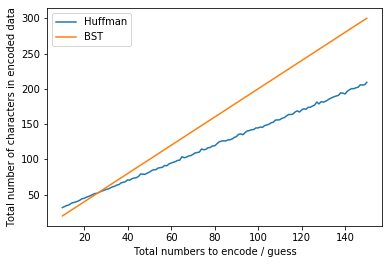

In [38]:
def plot_encoded_length(min_numbers, max_numbers, samples, tree_length):
    x = np.arange(min_numbers, max_numbers+1)
    y_huffman = []
    ## each number encoded by the binary search tree is always 2 characters long
    y_bst = x * 2
    
    for i in range(min_numbers, max_numbers+1):
        arr = []
        # Take samples and get an average for more consistency
        for j in range(samples):
            data = generate_sequence(i)
            encoded_sequence = ""
            for char in data:
                encoded_sequence += huffman_tree_encode(char)
                
            arr.append(len(encoded_sequence))
        
        ## add the average + tree length
        y_huffman.append(sum(arr) / len(arr) + tree_length)
    
    
    plt.xlabel("Total numbers to encode / guess")
    plt.ylabel("Total number of characters in encoded data")
    plt.plot(x, y_huffman, label = "Huffman")
    plt.plot(x, y_bst, label = "BST")
    plt.legend()
    plt.show()
        
plot_encoded_length(10, 150, 30, 20)

#### We notice that for smaller amounts of data, the Huffman compression actually takes *more* space, but as the amount of data increases the compression becomes more efficient. This depends on the length of *metadata* and *compressed data*. We will talk about those two later.


## How do you build a Huffman Tree?
The above example is too simple. We could intuitively figure out that as the number ```3``` is seen more often, we would of course express it in a shorter way (ask whether the number is ```3``` right away). Let's see how this method works when we work with more **complex data** (ex. file or text).

#### The steps to build a Huffman Tree are as follows:
1. **Analyze the data**, find out which pieces of it are **repeated the most**
2. **Order** the data units **by frequency**
3. **Assign shorter paths** in The Huffman Tree **to data units that are more frequent and longer paths to those less frequent**.

Consider the following text:
```still so silly```

#### Analyzing the data

* s - 3
* o - 1
* t - 1
* i - 2
* l - 4
* y - 1
* [whitespace] - 2


#### Ordering the data units by frequency

* **4** - l
* **3** - s
* **2** - i
* **2** - [whitespace]
* **1** - o
* **1** - t
* **1** - y


#### Assigning paths in the Binary Search Tree

In order to correctly build the tree, we must start from the **least frequent** units.
<img src="images/tree_1.png" width="60%"/>

We treat every **tree as a node** with it's value being **equal to the sum of it's children's frequencies** (denoted on the bottom right of each node).
<img src="images/tree_2.png" width="60%"/>

We now have following characters remaining:
* **4** - l
* **3** - s
* **2** - i

And as well the two **smaller trees** with their respective total weights.
* **3** - ```[whitespace]o```
* **2** - ```ty```

In the next step we again take the two smallest values, and create new **tree**.
<img src="images/tree_3.png" width="60%"/>

We are left with the following:
* **4** - l
* **4** - ```i(ty)```
* **3** - ```[whitespace]o```
* **3** - s

We add the **3 - s** node and group it together with the small tree with total weight =  **3**.

<img src="tree_4.png" width="60%"/>

We are left with the following:
* **6** - ```s([whitespace]o)```
* **4** - l
* **4** - ```i(ty)```

We take the node **4 - l** and the tree with total weight **4**, group them in another tree with a total weight = **8**.

<img src="images/tree_5.png" width="60%"/>

We only have 2 nodes left, we combine them into a tree and have **built the Huffman Tree**.
<img src="images/tree_6.png" width="60%"/>

### Let's now figure out the huffman codes.

For every time we go **left**, we will write a **0**, and for every time we go right, we will write a **1**.

* ```s``` - **00**
* ``` ``` - **010**
* ```o``` - **011**
* ```l``` - **11**
* ```i``` - **101**
* ```t``` - **1000**
* ```y``` - **1001**

As we can see, the most frequent character ```s``` has the **shortest huffman code**, while the two least frequent characters ```t y``` have the **longest huffman codes**.

Expressing the **14** character long text as 8-bit characters (1 byte for each character) would require **112 bits**.
Expressing the same text using the **huffman codes** would look like this:

In [39]:
def replace_with_huffman_codes():
    s = 'still so silly'
    s = s.replace('s', '00')
    s = s.replace(' ', '010')
    s = s.replace('o', '011')
    s = s.replace('l', '11')
    s = s.replace('i', '101')
    s = s.replace('t', '1000')
    s = s.replace('y', '1001')
    
    print(s)
    print("Length: ", len(s))
    
replace_with_huffman_codes()

0010001011111010000110100010111111001
Length:  37


Just **37 bits**, amazing!

But now, this data is **compressed** and it wouldn't at all resolve to the same text if we read it the way we read **uncompressed** data.


## How do we get the original data back?

In order to resolve the sequence back to the original data, all we have to do is **follow the Huffman tree**.

By starting at the top and interpreting each **bit** as a **go left** or **go right**, the moment we come to a **leaf** (endpoint) in the tree is when we know that the **bit sequence** resolves to the character in that specific leaf node of the tree. This code system is called **prefix coding**.

Let's resolve the code ```0001110111```. This sequence uses the same **Huffman tree** that we created from ```still so silly```.

The first character is a **0** - we move **left**, the next one is also a **0** so we move right. We have reached the **leaf** node with the character ```s```.

<img src="images/tree_resolve_1.png" width="60%"/>

The next three characters ```011```, resolve as follows to the character ```o```.

<img src="images/tree_resolve_2.png" width="60%"/>

The following ```101``` resolves to ``i`` (**right>left>left**)

The last bits - ``11`` resolve to ``l`` (**right>right**)

**The original data was ``soil``**.

#### To be able to resolve encoded data, we need to know the *Huffman codes* or the *Huffman tree*

## Storing Huffman Trees

Storing the huffman codes by themselves is inefficient, as systems **require** us to write a **full byte** (8 bits) of data before it can be saved in any kind of memory. **Huffman codes are usually shorter than 8 bits**.

We **need to know** where and how exactly to **read the tree** because if we don't get it right, data will not **make any sense after decompresion**. To do so, we will use the concepts of **metadata** and **serialization**.

##### Metadata is simply information about other data. 

We can store the huffman tree on top of the file, just like HTML has ``<head>`` and ``<body>``, where the ``<head>`` tag provides information about how to resolve the ``<body>`` such as the charset that it uses.

There are a few things required so we can **ensure that encoded data and metadata are correct** and **the data is not corrupt**.
* Total length of the **uncompressed** data (to ensure that decompression is correct)
* Total length of the **compressed** data (to ensure there is no confusion between ***metadata*** and ***compressed data***)
* Total length of the **metadata**

#### Let's take the left part of our ``still so silly`` tree.

<img src="images/storage_1.png" width="25%"/>

To express this tree in a human-readable format we can use **XML tags**.

```xml
<node>
	<left>'s'</left>
	<right>
		<node>
			<left>' '</left>
			<right>'o'</right>
		</node>
	</right>
</node>
```

We have **serialized** the tree as **XML**.
This format though, takes way too much space. Let's try to ***compress*** it while still **keeping the data easily readable by a machine**.

Let's shorten the tags:
* ``<node>`` becomes ``<n>``
* ``<left>`` becomes ``<l>``
* ``<right>``  becomes ``<r>``
* We remove the ``''`` (quotation marks) as they are just for clarity

The tree can now be expressed as follows:

```xml
<n>
	<l>s</l>
	<r>
		<n>
			<l> </l>
			<r>o</r>
		</n>
	</r>
</n>
```

We can remove the **tab** and **newline** characters as they are just for human comfort when reading.

The tree now looks like this:

```<n><l>s</l><r><n><l> </l><r>o</r></n></r></n>```

As we are only interested in **one character for each node**, be it **left or right** we can use the character after the opening tag ( ``l`` or ``r``) to specify the character.

This sequence is **45** characters long.

The longest this sequence can get is when we have all **256 possible ASCII characters**. Let's calculate it's length.

In [40]:
def create_xml_node(depth):
    # using ' ' (whitespace) instead of any of the 256 possible characters
    if(depth > 1):
        return '<n><l>' + create_xml_node(depth - 1) + '</l><r>' + create_xml_node(depth - 1) + '</r></n>';
    else:
        return '<n><l> </l><r> </r></n>';
    
    
def test_create_xml_node():
    # if result is correct, number of whitespaces should be equal to (2 ^ depth)
    assert 2 ** 8 == create_xml_node(8).count(' ')
    assert 2 ** 4 == create_xml_node(4).count(' ')
    
    print("Pass!")
    
test_create_xml_node()

Pass!


In [41]:
len(create_xml_node(8))

5611

This though, is still **way too large**. That's almost **6 KB** of storage just for the tree. 
If we add a few more characters for compressed/uncompressed data length and total metadata length, we will get around **5700 bytes**. (We will need this number soon enough).

We can use a different approach, called **Succinct Encoding**. We can build the tree from the **top down** starting from the **left** child, then the **right** child. This is called **Preorder traversal**.

* We will use ``(`` to denote the **start** of a node.
* The following characters will describe the **left child**. If it's a leaf node, we will just write the character (ex. ``a``).

* If its another **node**, we write another ``(`` and repeat the previous step to encode it's children until we finally reach a **leaf node**.

* After we successfully encode the left node, we take the next character and encode the **right node** the same way.


We also need to make sure that the **serialized data that cannot be interpreted in more than one way**. Files can contain **any 8 byte character from the ASCII table**.

In order to **avoid confusion between actual characters and characters that describe the tree**, we will use an escape character ``\``.
* ``\`` becomes ``\\``
* ``(`` becomes ``\(``

Let's see how this will look like for the following tree:
<img src="images/tree_escape.png" width="30%"/>

1. Starting at the root node, we write a ``(`` as it's the beginning of a tree
2. We look at the left node, it's not a leaf node so we write another ``(``
3. The left character is a leaf node with the character ``(``, we escape it ``\(`` to clarify that it's **just the character and not a new node**
4. We have serialized the **left leaf node** now we can move to the **right node**
5. The right node is a **leaf node** with the character ``)`` we write it down
6. We are **finished serializing the left child of the root node**, now we move to the **right child of the root node**
7. The right node is a **leaf node** with the character ``\``, to avoid confusion we escape it write it as ``\\``

#### The result of the serialization is: ``((\()\\``. This takes only *7 bytes* to store.

##### Let's compare the two ways to serialize data and their worst case scenarios.

In [42]:
def create_succinct_node(depth):
    # using ' ' (whitespace) instead of any of the 256 possible characters
    if(depth > 1):
        return '(' + create_succinct_node(depth - 1) + create_succinct_node(depth - 1);
    else:
        ## two whitespaces for left and right leaf nodes
        return '  ';
    
    
def test_create_succinct_node():
    # if result is correct, number of whitespaces(leaf nodes) should be equal to (2 ^ depth)
    assert 2 ** 8 == create_succinct_node(8).count(' ')
    assert 2 ** 4 == create_succinct_node(4).count(' ')
    
    print("Pass!")
    
test_create_succinct_node()

Pass!


In [43]:
# As we have 2 characters that require escaping, we must add 2 to the length of the tree
len(create_succinct_node(8)) + 2

385

Just **385 bytes**. That's much better than the XML approach. Taking into account the rest of the **metadata**, which would be just **3 integers** (2 * 8 bytes for data sizes, and 2 bytes for the metadata size itself), we can be sure that **metadata will take no more than 403 bytes** to store.

### Why does metadata size matter?

Modern computers store data on the drive in **chunks**. Chunks are the smallest **cells** in a storage device where data can be saved. In most modern storage devices standard chunk size is **4 KiB** or **4096 bytes**. A file, with a size of **4096 bytes** takes **1 chunk**, but a file sized **4097 bytes** would take **2 chunks**.

The **XML serialization** (5611 bytes) would have taken one whole chunk, and **1515 bytes** from the second one. This means the second chunk is left with just **2581 bytes to store actual compressed data**.

In **succinct serialization** (769 bytes) we have taken less than 20% of the chunk's size for metadata and have the remaining **3327 bytes to store actual compressed data**.

Let's have a look at the sizes for different sized files with some reasonable compression ratio, and see when they become **efficient** (metadata + compressed data is shorter than the original data)

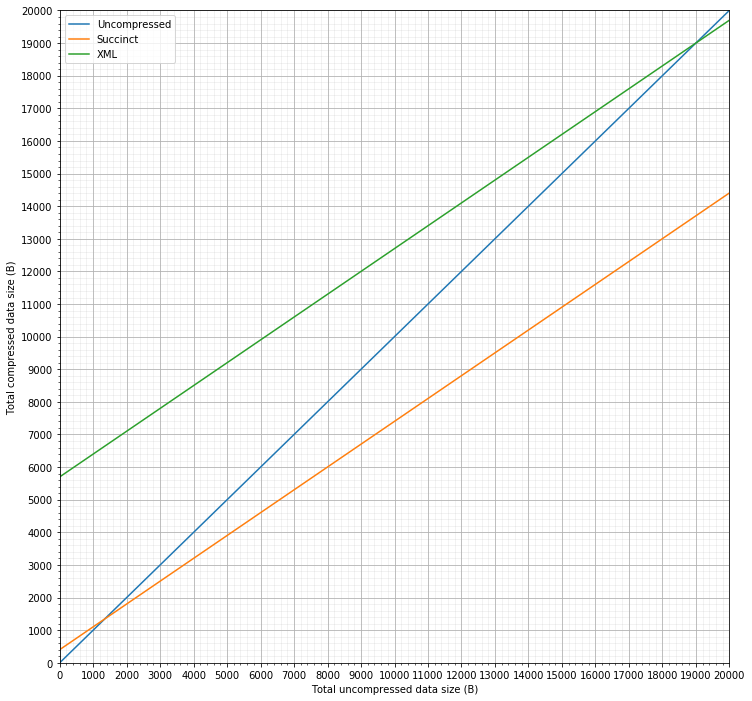

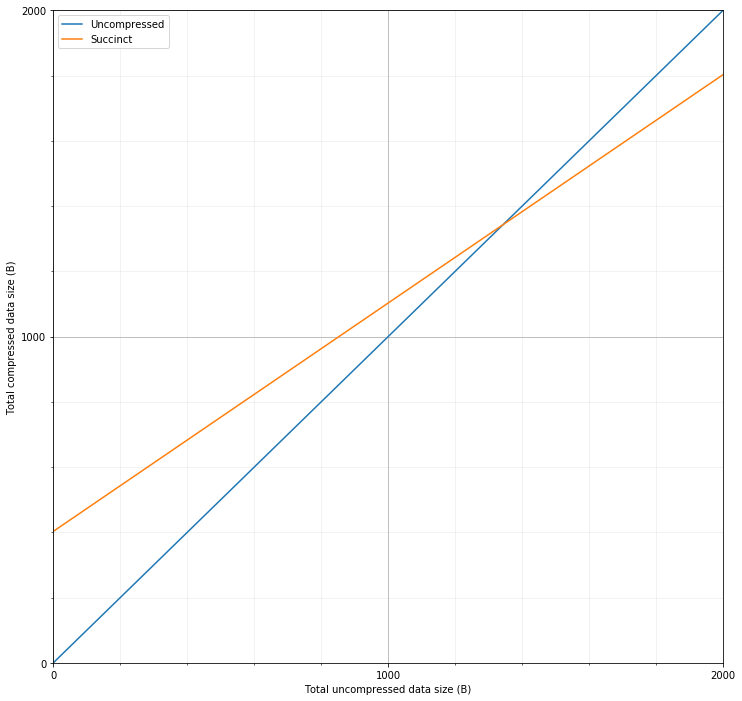

In [44]:
def plot_compressed_file_sizes(uc_min_size, uc_max_size, compression_rate, metadatas):
    ## Configure plot
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(1, 1, 1)
    
    major_ticks = np.arange(0, uc_max_size + 1, 1000)
    minor_ticks = np.arange(0, uc_max_size + 1, 200)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='both')

    ax.grid(which='minor', alpha = 0.2)
    ax.grid(which='major', alpha = 1)
    
    ax.set_xlim(xmin=0)
    ax.set_ylim(ymin=0)
    
    uncomp_sizes = np.linspace(uc_min_size, uc_max_size)
    
    plt.plot(uncomp_sizes, uncomp_sizes, label = "Uncompressed")
    ##
    
    for md in metadatas:
        sizes = (uncomp_sizes * compression_rate) + md[0]
        plt.plot(uncomp_sizes, sizes, label = md[1] or None)
        
    plt.xlabel("Total uncompressed data size (B)")
    plt.ylabel("Total compressed data size (B)")
    plt.legend()
    plt.show()
    
    
plot_compressed_file_sizes(0, 20000, 0.7, [[403, "Succinct"], [5700, "XML"]])
plot_compressed_file_sizes(0, 2000, 0.7, [[403, "Succinct"]])

To figure out at what amounts of data the compressions become efficient, we just have to see where their lines on the plot cross with the one of the uncompressed data.

We can now see that the **succinct** approach's metadata is starting to become efficient for compressing data at just around **1300 bytes** bytes, while the **XML** approach's metadata starts to become efficient at around **19000 bytes**.

## Implmenting Huffman Compression

We now have all the knowledge to properly implement the algorithm and compress some data.

Let's start with implementing a **node**.

In [46]:
class Node:
    def __init__(self, value, left = None, right = None):
        self.value = value
        self.left = left
        self.right = right
        
    def __str__(self):
        if self.is_leaf():
            return f'{self.value}'
        
        return f'[{self.value}] -> ({self.left}, {self.right})'
            
    def is_leaf(self):
        """ Returns a boolean determining whether the node is a leaf or not"""
        if self.left is None and self.right is None:
            return True
        
        return False
    
## Unit tests    
def test_Node_class():
    def test_ctor():
        ## test leaf node initialization
        node = Node('1')
        assert node.value == '1'
        
        ## test child node initialization
        node = Node(2, left = Node('1'), right = Node('2'))
        assert node.value == 2
        assert node.left.value == '1'
        assert node.right.value == '2'
        
        print("ctor() tests passed")
        
    def test_is_leaf():
        node = Node('1')
        assert node.is_leaf() == True
        
        node = Node(2, left = Node('1'), right = Node('2'))
        assert node.is_leaf() == False
        
        print("is_leaf() method tests passed")
        
    test_ctor()
    test_is_leaf()
    
    print("Node class tests passed")
    
    
test_Node_class()

ctor() tests passed
is_leaf() method tests passed
Node class tests passed


We now need a way to **serialize and deserialize trees** that we will later use when compressing data.

In [49]:
def serialize(node):
    """Recursively serializes a node"""
    ## recursion ends if is_leaf() returns True
    if node.is_leaf():
        ## check if character must be escaped
        if node.value == '(' or node.value == '\\':
            return '\\' + node.value
        
        return node.value
        
    return f'({serialize(node.left)}{serialize(node.right)}'

## Unit tests
def test_serialize_function():
    ## check if special character serialization is correct
    node = Node('\\')
    assert serialize(node) == '\\\\'
    node = Node('(')
    assert serialize(node) == '\\('
    
    ##check if tree serialization is correct
    ##    10
    ##   /  \
    ## 'a'   5
    ##      / \
    ##    'b' 'c'
    tree = Node(10)
    tree.left = Node('a')
    tree.right = Node(5, left = Node('b'), right = Node('c'))
    assert serialize(tree) == '(a(bc'
    
    print("serialize() tests passed")
    
test_serialize_function()

serialize() tests passed


In [19]:
class Indexer:
#helper class, need pointers
    def __init__(self):
        self.index = 0

def deserialize(s):
    """Deserializes a given string to a binary tree"""
    def deserialize_child(s, indexer):
        ## if index is larger than string length, recursion stops
        if indexer.index >= len(s):
            return
        
        ## if character isnt ( return leaf node
        if s[indexer.index] != '(':
            ## if character is \ go to next character
            if s[indexer.index] == '\\':
                indexer.index += 1
                
            indexer.index += 1
            
            return Node(s[indexer.index - 1])
        else:
        #return new node with 2 children
            node = Node(None)
            indexer.index += 1
            
            node.left = deserialize_child(s, indexer)
            node.right = deserialize_child(s, indexer)
            
            return node
        
    return deserialize_child(s, Indexer())

## Unit tests
def test_deserialize_function():
    ##test children deserialization
    node1 = Node(None, Node('a'), Node('b'))
    node2 = deserialize('(ab')
    
    assert serialize(node1) == serialize(node2)
    
    ##test special character deserialization
    node1 = Node(None, left = Node(None, left = Node('\\'), right = Node('(')), right = Node('a'))
    node2 = deserialize('((\\\\\\(a')
    
   
    assert serialize(node1) == serialize(node2)

    print('deserialize() function tests passed')
    
test_deserialize_function()

deserialize() function tests passed


#### We now have the basic data structures we will need to build huffman trees. Time to implement them.

In [48]:
def build_huffman_tree(counted_data):
    """Builds a huffman tree using the counted_data (Counter object) provided"""
    #map counter object to array, each character maps to a leaf node
    data = [[Node(x[0]), x[1]] for x in counted_data.most_common()]
    
    #take last 2, put them in a node then remove and sort
    while len(data) > 1:
        left = data[-2][0]
        right = data[-1][0]
        
        # sum the weights of nodes
        weight = data[-1][1] + data[-2][1]
        
        node = Node(weight, left, right)
        
        #pop last 2
        data.pop()
        data.pop()
        
        #add the new node to list
        data.append([node, weight])
        
        #sort data by weight, descending
        data.sort(key = lambda x: -x[1])
        
    return data[0][0]
    
## Unit tests
def test_build_huffman_tree():
    data = Counter('aaabbcc')
    #    7
    #   / \
    #  4   a
    # /\
    #b  c
    
    tree_result = build_huffman_tree(data)
    tree_expected = Node(7, Node(4, Node('b'), Node('c')), Node('a'))
    res_serial = serialize(tree_result)
    exp_serial = serialize(tree_expected)
    
    assert res_serial == exp_serial
    
    print("build_huffman_tree() tests passed")
    

test_build_huffman_tree()

build_huffman_tree() tests passed


#### We now need a way to use this huffman tree to get *huffed* (compressed) data.
To compress data, we need to know the **huffman codes from the tree**. Lets create a function to resolve those from a given tree

In [50]:
def get_huffman_codes(tree):
    """Returns a dictionary of huffman codes for all leaf nodes in a given tree"""
    #dictionary to store codes
    codes = {}
    
    #recursive method to traverse nodes and get codes
    def add_node_codes(node):
        #if leaf node, save code to dictionary and end recursion
        if node.is_leaf():
            codes[node.value] = node.code
            return
        
        #nodes get a 0/1 added to their code for left/right respectively and have their child nodes' codes resolved recursively
        node.left.code = node.code + "0"
        add_node_codes(node.left)
        node.right.code = node.code + "1"
        add_node_codes(node.right)
    
    #start root node with empty code 
    tree.code = ""
    add_node_codes(tree)
    
    return codes


## Unit tests
def test_get_huffman_codes():
    tree = Node(None)
    tree.left = Node('a')
    tree.right = Node(None, Node('b'), Node('c'))
    
    codes = get_huffman_codes(tree)
    assert codes['a'] == '0'
    assert codes['b'] == '10'
    assert codes['c'] == '11'
    
    print("get_huffman_codes() tests passed")
    
test_get_huffman_codes()

get_huffman_codes() tests passed


#### We now need a method that compresses given data.

As huffman codes are sometimes shorter than a byte, we will need to store them in a variable. Whenever it gets larger than 8 bits, we will convert those to a byte. If the final sequence is not large enough to save, we will fill it up with zeros until its length is 8 bits.

We need methods to convert bits to bytes and vice versa.

In [51]:
def bits_to_byte(bits):
    """Returns a byte representation of the [bits] string provided"""
    #if bits is shorter than 8 chars, fill with 0s
    if len(bits) < 8:
        bits = bits.ljust(8, '0')
    #start with a sum(value) of 0 and multiplier 1
    value = 0
    mult = 1
    #enumerate bits in reverse [index 7 to 0]
    for i in range(7, -1, -1):
        value += int(bits[i]) * mult
        mult *= 2
    
    return bytes([value])

def byte_to_bits(byte):
    """Returns a string of 0's and 1's, depicting the [byte]"""
    byte_int = int.from_bytes(byte, byteorder = "big")
    
    binary = bin(byte_int)
    
    return binary[2:].rjust(8, '0')

# Unit tests
def test_bits_to_byte():
    assert bits_to_byte('0') == bytes([0])
    assert bits_to_byte('11111111') == bytes([255])
    assert bits_to_byte('1') == bytes([128])
    
    print("bits_to_byte() tests passed")
    
def test_byte_to_bits():
    assert byte_to_bits(bytes([255])) == '11111111'
    assert byte_to_bits(bytes([128])) == '10000000'
    assert byte_to_bits(bytes([4])) == '00000100'
    assert byte_to_bits(bytes([0])) == '00000000'
    
    print("byte_to_bits() tests passed")
    
test_bits_to_byte()
test_byte_to_bits()

bits_to_byte() tests passed
byte_to_bits() tests passed


#### Now that we can work with bits as well, we can get to the actual compression and decompression of data

In [54]:
def enhuff(data, tree):
    """Compresses the given data with the given tree
    Returns: byte array representing the compressed data
    """
    ## get codes from the tree
    codes = get_huffman_codes(tree)
    
    #initialize empty bit string
    bit_string = ''
    #initialize empty array to store compressed data
    bytes_ = b''
    
    for char in data:
        # add huffman code to the bitstring
        bit_string += codes[char]
        
        #if bitstring is longer than 8, take first 8 characters and write to bytes array
        if len(bit_string) >= 8:
            byte = bits_to_byte(bit_string[:8])
            # add to bytes
            bytes_ += byte
            # remove first 8 bits from bitstring
            bit_string = bit_string[8:]
            
    #if there are any remaining bits, write to bytes array
    if len(bit_string) > 0:
        byte = bits_to_byte(bit_string)
        bytes_ += byte

            
    return bytes_

# Unit tests
def test_enhuff():
    data = 'aaaaaaabbbbbccc'
    tree = build_huffman_tree(Counter(data))

    #     15
    #    /  \
    #   8    a
    #  / \
    # b   c
    
    #codes
    # a : 1
    # b : 00
    # c : 01
    
    #replacing chars with codes, sequence looks like:
    # 11111110 00000000 0010101
    # 11111110 = 254
    # 00000000 = 0
    # 00101010 = 42
    
    assert enhuff(data, tree) == bytes([254, 0, 42])
    
    print("enhuff() tests passed")
    
test_enhuff()

enhuff() tests passed


In [53]:
def dehuff(bytes_, tree, data_length):
    """Decompresses the given bytes using the tree provided"""
    index = 0
    data = b''
    bits = ''
    
    #start at root node
    node = tree

    #resolve until expected amount of data is decoded
    while len(data) < data_length:
        #buffer bits so large arrays dont take too much memory
        if len(bits) == 0:
            bits = byte_to_bits(bytes([bytes_[index]]))
            index += 1
        
        # 0 goes left, 1 goes right
        if bits[0] == '0':
            node = node.left
        else:
            node = node.right
        
        # if leaf node is reached, append to data array and reset node to root
        if node.is_leaf():
            data += node.value
            node = tree
        
        # remove 1st element of bits string
        bits = bits[1:]
       
    return data

# Unit tests
def test_dehuff():
    data = b'aabc'
    #tree:    4
    #        / \
    #       a   2
    #          / \
    #         b   c
    #
    #codes:
    # a: 0
    # b: 10
    # c: 11
    #
    #encoded data: 001011
    #byte:         00101100   val = 0 + 0 + 4 + 8 + 0 + 32 = 44
    #encoded byte arr: [44]
    
    tree = Node(None, Node(b'a'), Node(None, Node(b'b'), Node(b'c')))
    encoded_data = bytes([44])
    
    dehuffed_data = dehuff(encoded_data, tree, len(data))
    expected = b'aabc'
    
    assert expected == dehuffed_data
    
    print("dehuff() tests passed")
    
test_dehuff()

dehuff() tests passed


In [55]:
def compress_file(filename, out_filename):
    """Compress a file using huffman compression"""
    
    def make_metadata(tree, data_length, compressed_length):
        """Function to create metadata for a given dataset and tree"""
        # file should look like: [metadata_length][uncompressed_data_length][compressed_data_length][tree_serial][data]
        # (2 * 8 bytes for data sizes, and 2 bytes for the metadata size itself)
                                       
        # get tree serial
        tree_serial = serialize(tree)
        
        # calculate metadata(tree) length and save as 2 bytes
        meta_length_bytes = len(tree_serial).to_bytes(2, byteorder='big')
        # uncompressed data length save as 8 bytes
        uncompressed_data_bytes = data_length.to_bytes(8, byteorder='big')
        # compressed data length save as 8 bytes
        compressed_data_bytes = compressed_length.to_bytes(8, byteorder = 'big')
        tree_serial_bytes = str.encode(tree_serial)
        
        return meta_length_bytes + uncompressed_data_bytes + compressed_data_bytes + tree_serial_bytes
    
    # read all data as chars from file
    with open(filename, 'r') as read_stream:
        data = read_stream.read()
        
    # count data and build tree
    counted_data = Counter(data)
    tree = build_huffman_tree(counted_data)
    
    # generate encoded data
    huffed_bytes = enhuff(data, tree)
    encoded_data = bytes(huffed_bytes)
    
    # generate metadata
    meta = make_metadata(tree, len(data), len(huffed_bytes))
    
    with open(out_filename, 'wb') as write_stream:
        write_stream.write(meta)
        write_stream.write(encoded_data)

In [56]:
def decompress_file(filename, out_filename):
    """Decompresses a given huffman compressed file"""
    # file should look like: [metadata_length][uncompressed_data_length][compressed_data_length][tree_serial][data]
    
    # after reading the tree from metadata the leaves are char values, we need to convert them to bytes
    def replace_leaves_with_bytes(node):
        if node.is_leaf():
            if not isinstance(node.value, bytes):
                node.value = node.value.encode()
            return
        else:
            replace_leaves_with_bytes(node.left)
            replace_leaves_with_bytes(node.right)
    
    with open(filename, 'rb') as read_stream:
        #read first 18 bytes of file to resolve metadata
        meta = read_stream.read(18)
        
        #first 2 bytes resolve tree length
        tree_length = int.from_bytes(meta[:2], byteorder = 'big')
        #next 8 bytes resolve uncompressed data length
        uncompressed_data_length = int.from_bytes(meta[3:10], byteorder = 'big')
        #next 8 bytes resolve compressed data length
        compressed_data_length = int.from_bytes(meta[12:], byteorder = 'big')
        
        #read tree_length characters
        tree_bytes = read_stream.read(tree_length)
        #decode tree
        tree_serial = tree_bytes.decode()
        #deserialize tree
        tree = deserialize(tree_serial)
        #convert leaves(chars) to bytes 
        replace_leaves_with_bytes(tree)
        
        #read next compressed_data_length chars
        data = read_stream.read(compressed_data_length)
        
        
    #dehuff data
    dehuffed_data = dehuff(data, tree, uncompressed_data_length)
        
    #write dehuffed data to file
    with open(out_filename, 'wb') as write_stream:
        write_stream.write(dehuffed_data)

## Compression ratio

Now that we can compress some files, it's time to test the efficiency of the algorithm.

We can start by compressing some text, ```lorem.txt``` contains a bunch of placeholder text. Let's see how much memory we can save by using compression.

In [59]:
def compress_and_decompress(filename):
    compress_file(filename, filename + '.huffed')
    decompress_file(filename + '.huffed', 'unhuffed_' + filename)

In [62]:
compress_and_decompress('lorem.txt')

In [65]:
original_size = os.path.getsize('lorem.txt')
compressed_size = os.path.getsize('lorem.txt.huffed')
decompressed_size = os.path.getsize('unhuffed_lorem.txt')

print(original_size, compressed_size, decompressed_size)

6767 3669 6749


We can see that sizes for the original file and it's decompressed counterpart are different. This is because of line endings. In **Windows** the line endings are encoded as the characters ```\r\n```, while in **Unix** based systems, it's just ```\n```.
Since while encoding we did not specify the type, default encoding is **Unix**. The files are still readable.

Let's check how much data we have saved.

In [69]:
compressed_size / original_size * 100

54.21900398995123

The compressed file is just **54.2%** the size of it's uncompressed counterpart.

## Comparison to other compression algorithms

Huffman compression only makes frequent characters shorter to express. Let's say we have a file with the following content:
```
compression compression compression compression
compression compression compression compression
compression compression compression compression
compression compression compression compression
compression compression compression compression
```

Let's check how huffman compression performs for this file.

In [80]:
compress_and_decompress('compression.txt')
original_size = os.path.getsize('compression.txt')
compressed_size = os.path.getsize('compression.txt.huffed')
decompressed_size = os.path.getsize('unhuffed_compression.txt')

print(original_size, compressed_size, decompressed_size)

print(compressed_size / original_size * 100)

243 141 239
58.0246913580247


We have **58 %** compression on this file. More advanced algorithms use **grouped data**.

The word ``compression`` occurs 20 times in this file. The other characters that we have are **whitespace** and **newline**.

We could use a **reference** to the word ``compression`` to express it.

``compression = a``

The text, replacing every ``compression`` except the first and having a dictionary of all references to words, could look like this:
```
<meta>
compression=a
</meta>
a a a a
a a a a
a a a a
a a a a
```

There is still a **pattern** in the data. ``a a a a`` is a sequence we see a whole **5 times**
```
<meta>
compression=a
a a a a=b
</meta>
b
b
b
b
```

We still have the ``b\n`` (b and a new line next to it) appear 4 times, we could put this in the dictionary too.
```
<meta>
compression=a
a a a a=b
b\n = c
</meta>
cccc
```

After following these simple steps of **grouping repeating data and using references to other data that we already know**, let's check the file total length of this sequence.

In [79]:
s = "<meta>\n\compression=a\na a a a=b\nb\n = c</meta>cccc"
len(s)

49

The total length of the original file was **243**, we now have a length of **49**. That's **20%** of the original file size.

#### To conclude, Huffman compression can be very efficient to encode repeating data, but when it comes to <font color="red">repeating sequences of data</font> we can use dictionaries, references, and other *tricks* to compress data even further. Modern compression algorithms combine both huffman compression and the method we used above.


### Sources
[Huffman Coding: A CS2 Assignment, Duke University](https://www2.cs.duke.edu/csed/poop/huff/info/)

[Huffman Coding, Purdue University](https://engineering.purdue.edu/ece264/17au/hw/HW13?alt=huffman)

[How Huffman Trees Work, Computerphile @ Youtube](https://www.youtube.com/watch?v=umTbivyJoiI)

[Prefix code, Wikipedia](https://en.wikipedia.org/wiki/Prefix_code)